Presentation theme: Your target audience is non-technical people interested in using your findings to maximize their profit when selling their home.

- figure out 3 - 4 questions:
    - what are the top 5 features that are the most important in determining house prices. Rank by importance.
    - how much in average is the difference in waterfront houses and non-waterfront houses
    - which zipcode attracts higher prices and vice versa
    - how have average house prices faired over time & what is the best time of year to sell
    - does yard sqft or living sqft impact more?
    
    
- clean data & feature engineering
    - duplicates: issues it could be sold multiple times
    - find missing values
    - find odd values (too high / negative values)
    - find outliers values (figure out what to do with them)
    - do we need to change datatype of any columns? to date? to int64
    - do we need to encode any categorical data?
    - any new variabes we can create or combine
    
- which columns to drop
    - id / yr_renovated
   
- visualization & basic stats
    - use correlation matrix (use np.triangle etc)
   
   
- linear regression - multiple
    - plot the coefficients in a graph
    - identify how adding each coefficient improves the R2
    - pick out the highest coefficients and plot simple regression / use reg coef to identify deeper to above ques
    - use p value


- understand the output of statsmodel


Questions
* "How did you pick the question(s) that you did?"
* "Why are these questions important from a business perspective?"
* "How did you decide on the data cleaning options you performed?"
* "Why did you choose a given method or library?"
* "Why did you select those visualizations and what did you learn from each of them?"
* "Why did you pick those features as predictors?"
* "How would you interpret the results?"
* "How confident are you in the predictive quality of the results?"
* "What are some of the things that could cause the results to be wrong?"

Data Issues Encountered:

Duplicate Data
    - id

Missing Data
    - waterfront 
    - view 
    - yr_renovated

Outliers
    - sqft_living
    - sqft_lot
    - sqft_lot15
    - bedroom
    
Adding New Columns

Incorrect data type
    - sqft_basement: treated as text as oppose to int64 / float64 due to '?'
    
- Scaling Data to log normal
- categorical variables zipcode
- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

# Import the data and parse the 'date' column as the second argument to convert the column dtype from str to datetime

In [2]:
url = 'https://raw.githubusercontent.com/Ftan91/Project-1---Kings-County-House-Dataset/master/kc_house_data.csv'
df = pd.read_csv(url, parse_dates = ['date'])

Check the first 5 rows of the dataframe and get the general information of the dataframe

In [3]:
display (df.head())
df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Check and drop for duplicates

In [4]:
df = df.drop_duplicates(subset = 'id')
print ('Number of rows before: 21597')
print ('Number of rows after dropping duplicates: {}'.format(df.shape[0]))
print ('Total number of rows dropped: {}'.format(21597 - df.shape[0]))

Number of rows before: 21597
Number of rows after dropping duplicates: 21420
Total number of rows dropped: 177


In [5]:
# define function to return number of unique data types and the list of data types for a single column
def datatype_search(column):
    x = df[column].unique()
    y = set([type(number) for number in x])
    z = len(y)
    return list(y), z

# define function to return a random number based on given list of choice, added with probability
def function(column):
    if column == 'sqft_basement':
        basement_unique = df[df['sqft_basement'] != '?']['sqft_basement'].unique()
        basement_prob = df[df['sqft_basement'] != '?']['sqft_basement'].value_counts(normalize = True)
        return np.random.choice(basement_unique, 1, p= basement_prob)[0]
    else:
        unique = df[df[column].notnull()][column].unique()
        prob = df[df[column].notnull()][column].value_counts(normalize = True)
        return np.random.choice(unique, 1, p= prob)[0]
    
def year_value(row):
    if row["yr_renovated"] == 0.0 or pd.isna(row["yr_renovated"]) == True:
        return row["yr_built"]
    else:
        return row["yr_renovated"]

Print general description of each column including missing values, number of data entries for each column, negati

In [6]:
# check for missing values, multiple data entries for each column, negative values and 
isnull = df.isnull().sum().sort_values(ascending = False)

for column in isnull.index:
    print ('Column name: {}'.format(column))
    print ('Number of null entries: {}'.format(df[column].isnull().sum()))
    print ('Number of unique datatype: {}'.format(datatype_search(column)[1]))
    print ('Data entry type: {}'.format(datatype_search(column)[0]))
    print ('Min: {}, Max: {}'.format(df[column].min(), df[column].max()))
    print ('\n')

Column name: yr_renovated
Number of null entries: 3804
Number of unique datatype: 1
Data entry type: [<class 'numpy.float64'>]
Min: 0.0, Max: 2015.0


Column name: waterfront
Number of null entries: 2353
Number of unique datatype: 1
Data entry type: [<class 'numpy.float64'>]
Min: 0.0, Max: 1.0


Column name: view
Number of null entries: 63
Number of unique datatype: 1
Data entry type: [<class 'numpy.float64'>]
Min: 0.0, Max: 4.0


Column name: sqft_lot15
Number of null entries: 0
Number of unique datatype: 1
Data entry type: [<class 'numpy.int64'>]
Min: 651, Max: 871200


Column name: date
Number of null entries: 0
Number of unique datatype: 1
Data entry type: [<class 'numpy.datetime64'>]
Min: 2014-05-02 00:00:00, Max: 2015-05-27 00:00:00


Column name: price
Number of null entries: 0
Number of unique datatype: 1
Data entry type: [<class 'numpy.float64'>]
Min: 78000.0, Max: 7700000.0


Column name: bedrooms
Number of null entries: 0
Number of unique datatype: 1
Data entry type: [<class

Fill columns with missing values according to column distribution

In [7]:
missing_values_column = ['yr_renovated', 'waterfront', 'view', 'sqft_basement']

for column in missing_values_column:
    df[column] = df[column].map(lambda x: function(column) if (pd.isnull(x) or x == '?') else x)
    
df['sqft_basement'] = df['sqft_basement'].map(lambda x: int(float(x)))  

Deep dive into sqft columns.
For clarity, sqft_lot is defined as the sqft_living (above and basement) and all yard (front and back)

Potential issue for that might include different, ie sqft_living > sqft lot

In [8]:
sqft_columns = ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'floors']

to_remove = df[sqft_columns][df.sqft_living > df.sqft_lot].index
print ('Rows to remove {}'.format(len(to_remove)))

df.drop(to_remove, axis = 0, inplace = True)

df['sqft_yard'] = df['sqft_lot'] - df['sqft_living']
df['price_pct_yard'] = round((df.sqft_yard / df.sqft_lot), 2)
df['price_pct_living'] =round((df.sqft_living / df.sqft_lot), 2)

df[['price_pct_yard', 'price_pct_living']].mean()

Rows to remove 788


price_pct_yard     0.71
price_pct_living   0.29
dtype: float64

In [9]:
df['month_sold'] = df['date'].dt.month 
df['day_sold'] = df['date'].dt.dayofweek

df['year_old'] = df.apply(lambda row: year_value(row), axis=1)
df['house_age'] = 2019 - df['year_old']

In [10]:
df.drop(df[df.bedrooms > 20].index, axis = 0, inplace = True)

Check on target variable ('price)

# 1. What are the top 5 - 6 house features in determining house price?

First let's take a look at the distribution of the target variable. To avoid large coefficients, normalize the data

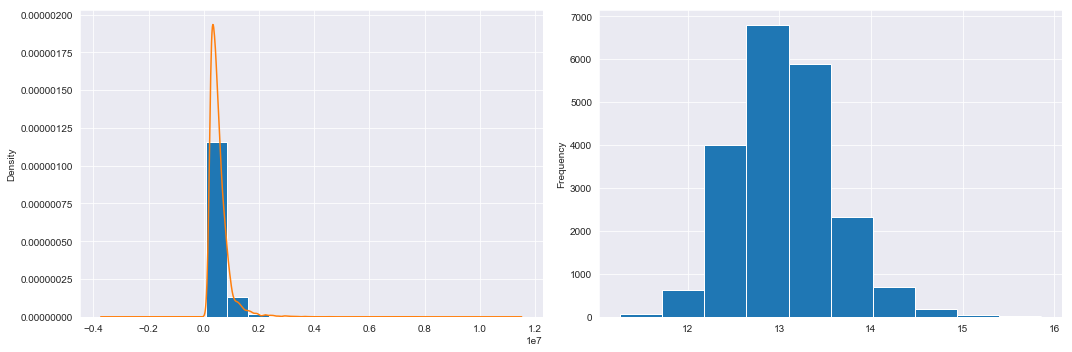

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15,5), tight_layout = True)

df.price.plot.hist(normed = True, label = 'price histogram', ax = ax[0])
df.price.plot.kde(label = 'price kde', ax = ax[0])

df['log_price'] = np.log(df.price)
df.log_price.plot.hist(label = 'log normal price', ax = ax[1])

plt.show()

Identify top 5 variables with the strong correlation to price / log price

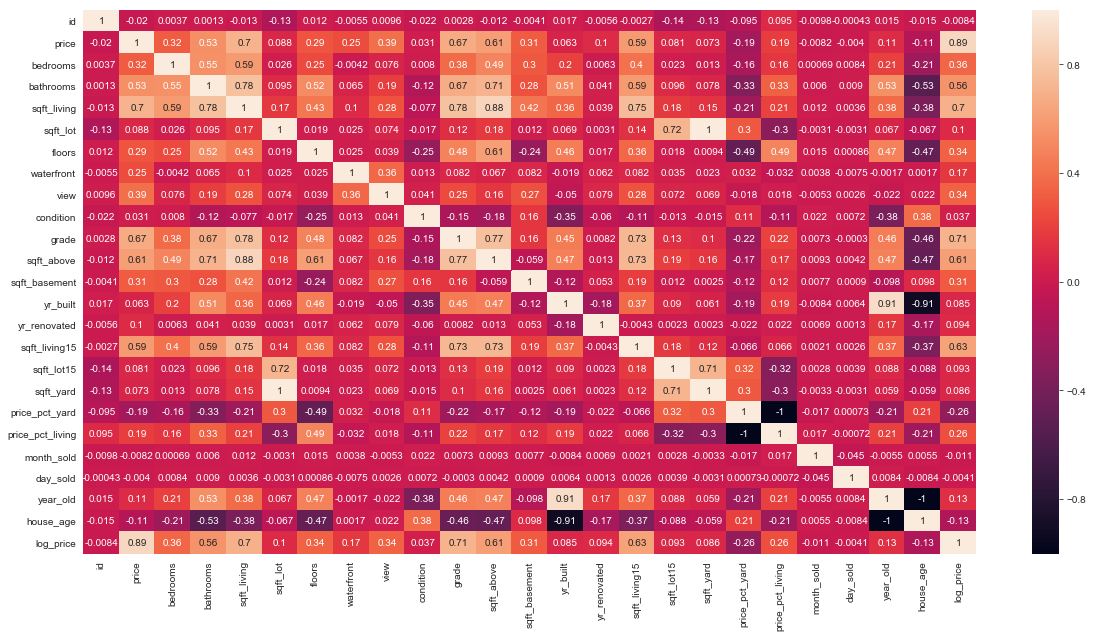

In [12]:
df_excluding_date_location = df.drop(['date', 'zipcode','lat', 'long'], axis = 1)
correlation_matrix = df_excluding_date_location.corr()

fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlation_matrix, annot = True, ax = ax)
plt.show()

In [28]:
x = correlation_matrix['price'].sort_values(ascending = False)
top6_price_correlation = x[:11]
top6_price_correlation.drop(['price','log_price', 'sqft_above', 'sqft_basement', 'sqft_living15'], axis = 0, inplace = True)

top6_price_correlation

sqft_living   0.70
grade         0.67
bathrooms     0.53
view          0.39
bedrooms      0.32
floors        0.29
Name: price, dtype: float64

In [29]:
z = correlation_matrix['log_price'].sort_values(ascending = False)
top5_logprice_correlation = z[:13]
top5_logprice_correlation.drop(['price','log_price', 'sqft_above', 'sqft_living15'], axis = 0, inplace = True)
top5_logprice_correlation

grade              0.71
sqft_living        0.70
bathrooms          0.56
bedrooms           0.36
view               0.34
floors             0.34
sqft_basement      0.31
price_pct_living   0.26
waterfront         0.17
Name: log_price, dtype: float64

Now that we have identify the top 6 variables, let's dig deeper into how each variable perform in a simple linear regression model

In [30]:
used_variables = list(top6_price_correlation.index) + ['price']
used_variables_log_price = list(top6_price_correlation.index) + ['log_price']
df_model = df[used_variables]
df_model_log = df[used_variables_log_price]

top6_price_correlation

sqft_living   0.70
grade         0.67
bathrooms     0.53
view          0.39
bedrooms      0.32
floors        0.29
Name: price, dtype: float64

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for index in range(len(top6_price_correlation)):
    f = 'price~' + used_variables[index]
    model = ols(formula = f, data = df_model).fit()
    model.summary()
    print ('Feature: ', used_variables[index])
    print ('Pearson: {}, Pearson squared: {}'.format(round(top6_price_correlation[index],2), round(top6_price_correlation[index] ** 2,2)))
    print ('R-squared: ', round(model.rsquared,2))
    print ('P- Values: ')
    print (model.pvalues)
    print ('\n')

Feature:  sqft_living
Pearson: 0.7, Pearson squared: 0.49
R-squared:  0.49
P- Values: 
Intercept     0.00
sqft_living   0.00
dtype: float64


Feature:  grade
Pearson: 0.67, Pearson squared: 0.45
R-squared:  0.45
P- Values: 
Intercept   0.00
grade       0.00
dtype: float64


Feature:  bathrooms
Pearson: 0.53, Pearson squared: 0.28
R-squared:  0.28
P- Values: 
Intercept   0.91
bathrooms   0.00
dtype: float64


Feature:  view
Pearson: 0.39, Pearson squared: 0.15
R-squared:  0.15
P- Values: 
Intercept   0.00
view        0.00
dtype: float64


Feature:  bedrooms
Pearson: 0.32, Pearson squared: 0.1
R-squared:  0.1
P- Values: 
Intercept   0.00
bedrooms    0.00
dtype: float64


Feature:  floors
Pearson: 0.29, Pearson squared: 0.08
R-squared:  0.08
P- Values: 
Intercept   0.00
floors      0.00
dtype: float64




### Let's check for how the combined features perform in a multiple linear regression

In [36]:
f = 'price ~ sqft_living+grade+bathrooms+view+bedrooms+floors'
model = ols(formula = f, data = df_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     4720.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:15:54   Log-Likelihood:            -2.8501e+05
No. Observations:               20631   AIC:                         5.700e+05
Df Residuals:                   20624   BIC:                         5.701e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.387e+05    1.5e+04    -29.175      0.000   -4.68e+05   -4.09e+05
sqft_living   205.1627      3.757     54.608      0.000     197.799     212.527
grade        9.528e+04   2392.417     39.828      0.000    9.06e+04       1e+05
bathrooms   -1.467e+04   3759.153     -3.901      0.000    -2.2e+04   -7297.325
view         9.101e+04   2299.733     39.574      0.000    8.65e+04    9.55e+04
bedrooms    -3.504e+04   2395.881    -14.625      0.000   -3.97e+04   -3.03e+04
floors      -3.514e+04   4020.888     -8.740      0.000    -4.3e+04   -2.73e+04
==============================================================================
Omnibus:                    15277.556   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           872188.218
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      34.276   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. How have average prices faired over time & when is the best time to sell

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15,10), tight_layout = True)

df.month_sold.value_counts(sort = False).plot(kind = 'bar', ax = ax[0][0], title = 'Count of Sales by Months')
ax[0][0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

df.day_sold.value_counts(sort = False).plot(kind = 'bar', ax = ax[0][1], title = 'Count of Sales by Day')
ax[0][1].set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

df.groupby('month_sold')['price'].mean().plot(kind = 'bar', ax = ax[1][0], title = 'Average Price by Month')
ax[1][0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[1][0].set_xlabel('')

df.groupby(df.date.dt.to_period('M'))['price'].mean().plot(ax = ax[1][1], title = 'Evolution of Avg Sale Price')
ax[1][1].set_xticks(df.groupby(df.date.dt.to_period('M'))['price'].mean().index)
plt.xticks(rotation = 45)
ax[1][1].set_xticklabels(df.groupby(df.date.dt.to_period('M'))['price'].mean().index)
ax[1][1].set_xlabel('')

plt.show()

# 3. Which zipcodes attracts higher prices and vice versa

In [ ]:
zipcode = df.groupby('zipcode')['price'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(1, 2, figsize = (15,5), tight_layout = True)

zipcode[:15].plot(kind = 'bar', ax = ax[0], title = 'top 15 zipcodes')
zipcode[-15:].plot(kind = 'bar', ax = ax[1], title = 'bottom 15 zipcodes')

plt.ylabel('Average sale price')
plt.show()

In [ ]:
continuous_var = ['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_abv&below', 'sqft_lot&living', 'sqft_neighbor_total']
ordinal_var = ['condition', 'view', 'grade']
categorical_var = ['waterfront', 'view', 'zipcode']
date = ['date', 'year', 'month', 'day']

In [ ]:
sns.pairplot(df[continuous_var])

Based on above initial checks, we can confidently say that bathroom and total sqft appear to be good predictors for our regression analysis.

Anything that violates OLS assumptions

In [ ]:
waterfront_bedrooms = df.groupby(['waterfront', 'bedrooms'])['price'].mean().reset_index()
waterfront_floor = df.groupby(['waterfront', 'floors'])['price'].mean().reset_index()
waterfront_condition = df.groupby(['waterfront', 'condition'])['price'].mean().reset_index()

f, axes = plt.subplots(1, 3, tight_layout = True, figsize = (20, 8))

sns.catplot(x = 'bedrooms', y = 'price', hue = 'waterfront', data = waterfront_bedrooms, kind = 'bar', ax = axes[0])
sns.catplot(x = 'floors', y = 'price', hue = 'waterfront', data = waterfront_floor, kind = 'bar', ax = axes[1])
sns.catplot(x = 'condition', y = 'price', hue = 'waterfront', data = waterfront_condition, kind = 'bar', ax = axes[2])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['price', 'date'], axis =1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1111)
linreg_model = LinearRegression(fit_intercept = False, normalize = True)
linreg_model.fit(X_train, y_train)
predictions = linreg_model.predict(X_test)
mse = mean_squared_error(predictions, y_test)
r_squared = r2_score(predictions, y_test)
coef = np.sort(linreg_model.coef_)

print (r_squared)
print ('\n')
for i in range(len(X.columns)):
    print ('{} coef: {}'.format(X.columns[i], round(coef[i],2)))

Do note that the fact that we transformed X, interpretation can sometimes require a little more attention. In fact, as the model is built on the transformed X, the actual relationship is "how does Y change for each additional unit X'", where X' is the (log- and min-max, standardized,...) 